<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LINEAR REGRESSION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
car = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/ToyotaCorolla.csv')

## **Exploratory Data Analysis**

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [5]:
car.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
car.head(4)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


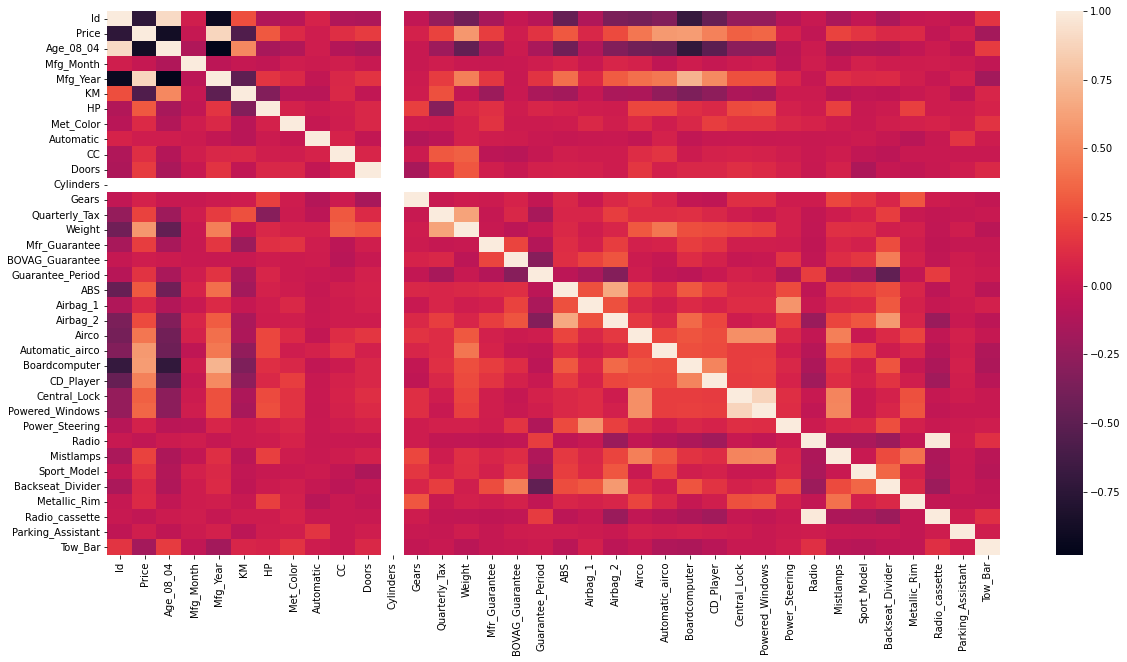

In [7]:
correlation_matrix = car.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data=correlation_matrix,ax=ax)

In [ ]:
car.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,-0.130207,NaN,-0.043343,-0.240821,-0.414500,-0.162006,-0.015065,-0.086256,-0.461437,-0.123465,-0.358316,-0.386207,-0.327468,-0.695207,-0.464520,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,-0.049103,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,NaN,0.063104,0.219197,0.581198,0.197802,0.028133,0.146627,0.306138,0.093588,0.248974,0.429259,0.588262,0.601292,0.481374,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,0.044375,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253,-0.164658,0.006865,-0.152563,-0.412887,-0.105406,-0.329017,-0.403600,-0.426259,-0.719449,-0.510895,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,-0.048172,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,NaN,-0.013063,0.031373,-0.002167,-0.005771,-0.003863,0.029010,0.072532,0.003756,0.076749,0.057088,-0.049017,0.017715,-0.016736,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,0.007113,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,NaN,0.007766,0.193934,0.473478,0.166697,-0.006206,0.148218,0.402215,0.105359,0.317075,0.395674,0.437718,0.720567,0.517008,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,0.047171,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598,-0.212851,0.001438,-0.138942,-0.177203,-0.018012,-0.139275,-0.133057,-0.258221,-0.353862,-0.266826,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,-0.064318,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614,0.140026,0.022701,0.076163,0.057832,0.025137,0.017644,0.241134,0.244957,0.129715,0.102300,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.029990,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,0.011326,0.057929,0.154850,0.010783,0.009295,0.022298,0.100055,0.038416,0.114190,0.027977,0.089886,0.198220,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.036691,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,0.057249,0.026194,0.023393,-0.002256,-0.016128,-0.011895,0.001171,-0.028353,0.059057,-0.037069,-0.010967,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.159985,0.018786
CC,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,0.335637,-0.057407,-0.081725,-0.017683,0.037806,0.022678,0.024738,0.119888,0.162669,0.009312,0.057787,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002883,0.002725


In [8]:
car['Cylinders'].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


y=car['Price']
X=car.drop(['Price','Cylinders','Id'],axis=1)




In [4]:
print(y.shape)
print(X.shape)

(1436,)
(1436, 36)


## **Train-Test Split Evaluation**

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

**Train Dataset:** Used to fit the machine learning model.

**Test Dataset**: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

In [5]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
#The size of the split can be specified via the “test_size” argument that takes a number
# of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.
#Using random state with integer value, we get the same train and test size. 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1148, 362)
(1148,)
(288, 362)
(288,)


In [6]:
car_lm = LinearRegression()
car_lm.fit(X_train, y_train)


LinearRegression()

In [7]:
cf=pd.DataFrame({'Predictor': X.columns, 'coefficient':car_lm.coef_})
cf

,Predictor,coefficient
0,Age_08_04,-90.724774
1,Mfg_Month,-69.718375
2,Mfg_Year,13.370262
3,KM,-0.016431
4,HP,286.659560
...,...,...
357,Color_Red,397.966884
358,Color_Silver,386.274345
359,Color_Violet,1660.819967
360,Color_White,38.105460


                                             Predictor    coefficient
0    Model_TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors  -15135.508061
1    Model_TOYOTA Corolla 1.3 SDN LINEA TERRA AUT 4...  -14128.946154
2    Model_TOYOTA Corolla LIFTBACK 1.6-16v Linea Lu...  -14037.706244
3    Model_TOYOTA Corolla 1.3 HB LINEA TERRA AUT 2/...  -13523.607756
4       Model_TOYOTA Corolla 1.3 Linea Terra 4/5-Doors  -13049.295085
..                                                 ...            ...
357       Model_TOYOTA Corolla 1.4 VVT-i Sol 2/3-Doors    8579.020859
358  Model_TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BN...   10726.884387
359                                          Automatic   12090.460736
360                                   Fuel_Type_Diesel   19583.426454
361          Model_TOYOTA Corolla 1.6 5drs 1 4/5-Doors  356043.930101

[362 rows x 2 columns]


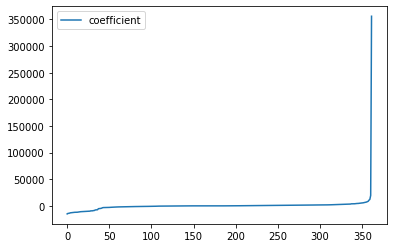

In [8]:
cf.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(cf)
cf.plot()

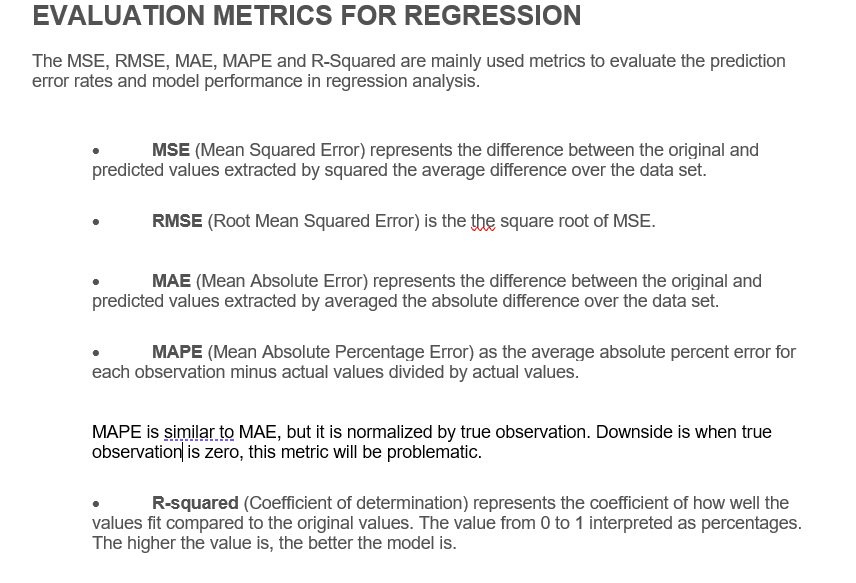

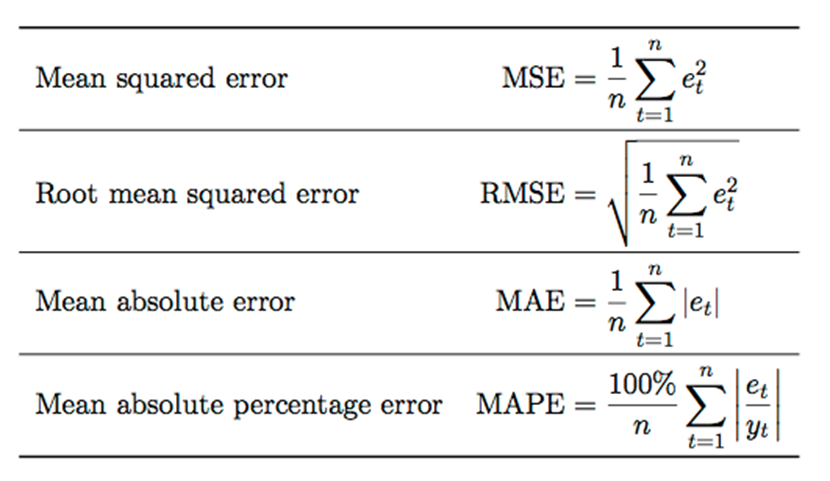

In [9]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [10]:
#Performance of Training Data 
predT=car_lm.predict(X_train)
evalmetric(y_train,predT)

MSE: 497176.43480853544
RMSE: 705.1073923939072
MAE: 506.8774260742704
MAPE: 5.180329281601995
R-Squared: 0.9643485348610032


In [11]:
#Performance of Test Data
pred=car_lm.predict(X_test)
evalmetric(y_test,pred)

MSE: 4577296.540695917
RMSE: 2139.461740881551
MAE: 1147.8304005523285
MAPE: 11.093408395176946
R-Squared: 0.5358025159259279


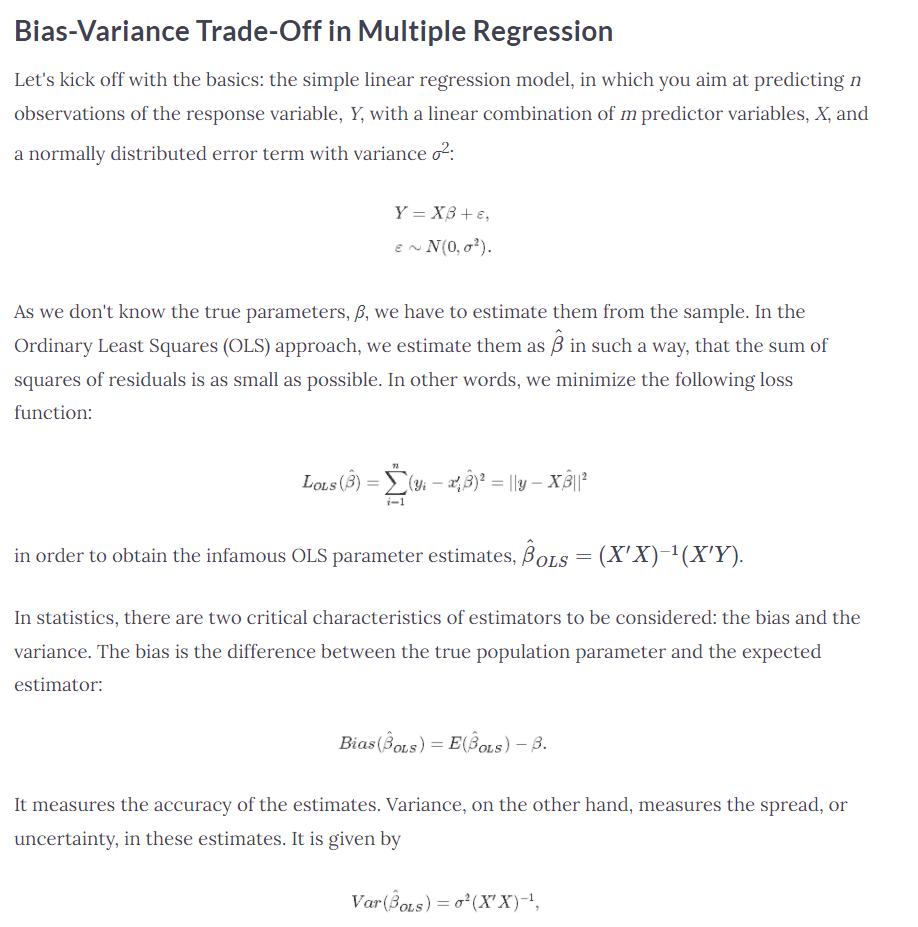

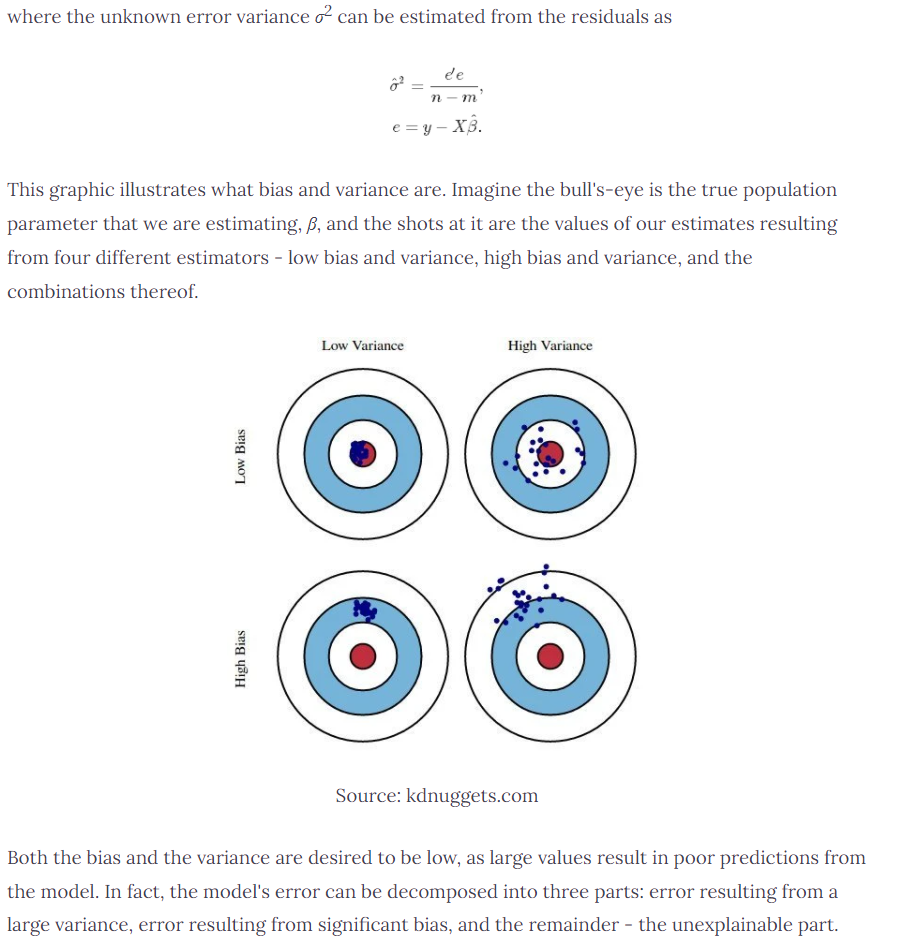

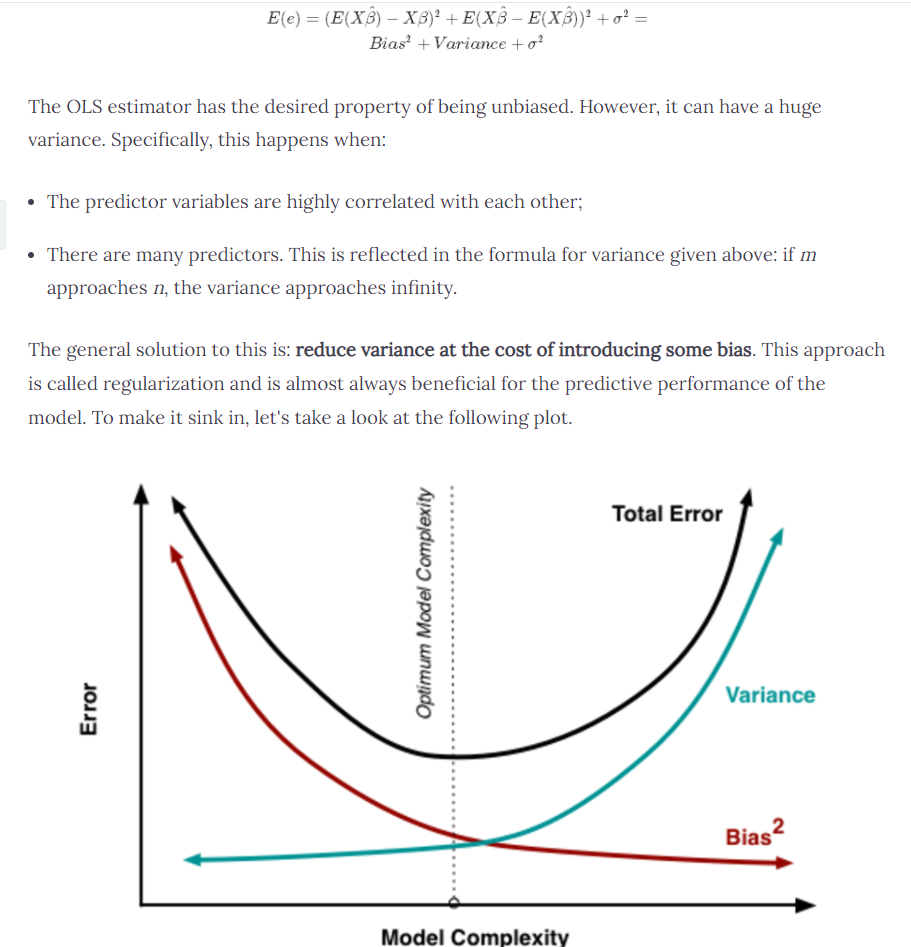

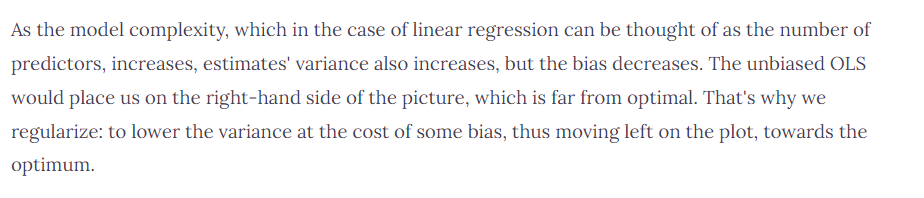

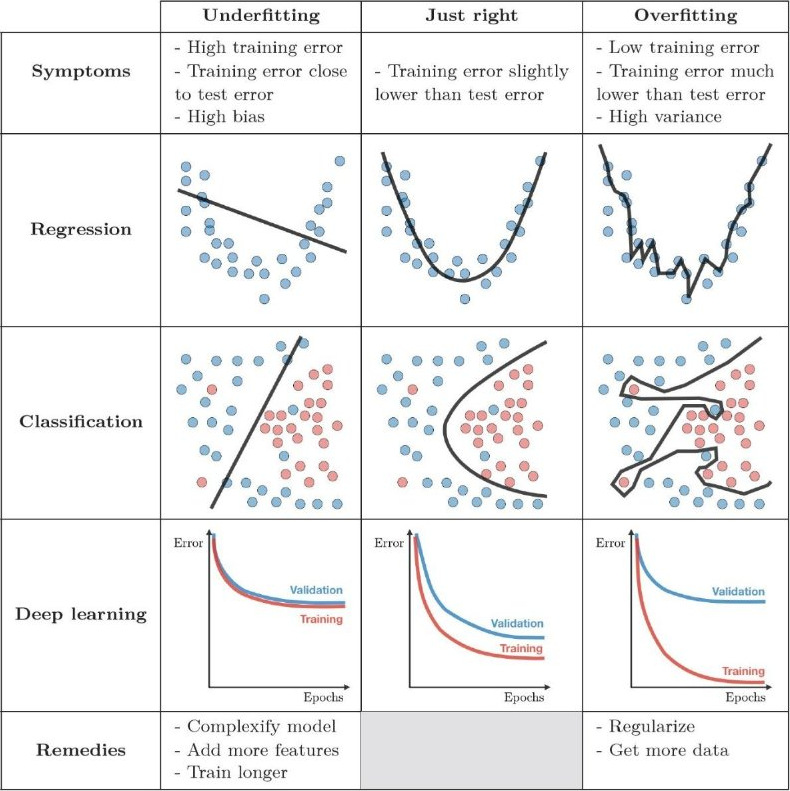

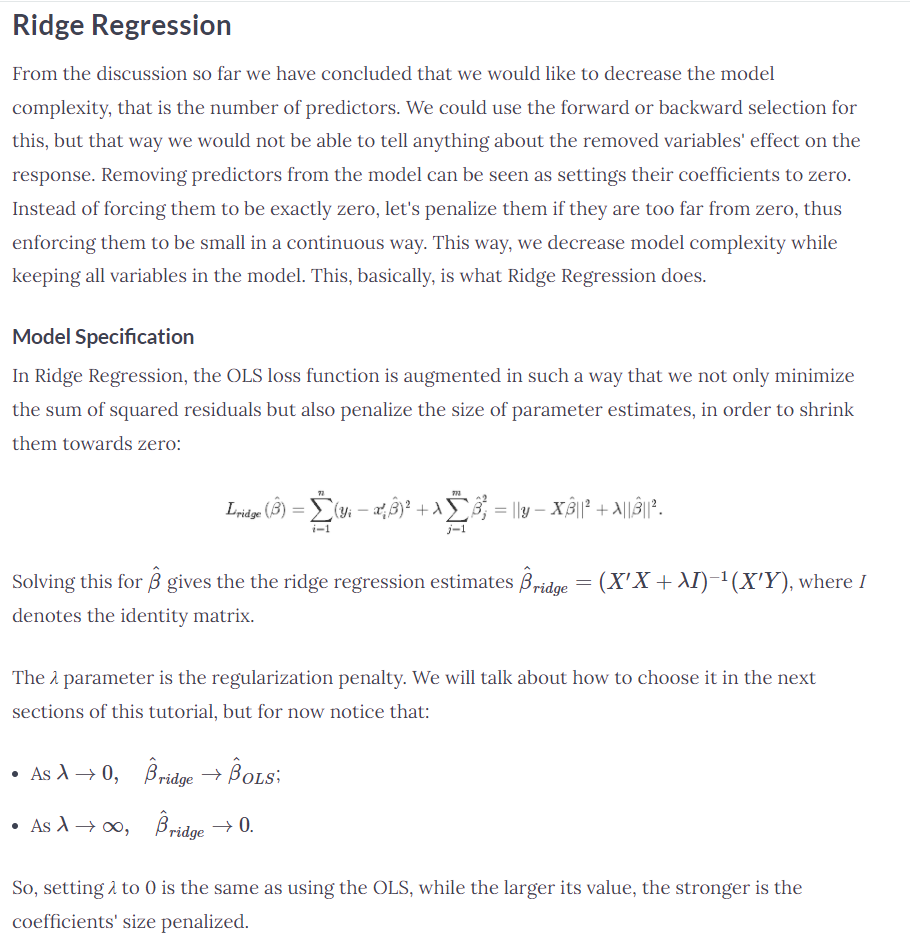

In [27]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet, LassoCV,RidgeCV
ridge2 = Ridge()
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data


Ridge()

In [19]:
# evaluation of training data
predR = ridge2.predict(X_train)           
evalmetric(y_train,predR)

MSE: 644003.5878033302
RMSE: 802.498341308772
MAE: 621.3945879928647
MAPE: 6.268361208257947
R-Squared: 0.9538198718754619


In [21]:
# evaluation of test data
predR = ridge2.predict(X_test)           
evalmetric(y_test,predR)

MSE: 1037167.6979638425
RMSE: 1018.4143056555336
MAE: 767.7707281459657
MAPE: 7.927134633310187
R-Squared: 0.8948176873232437


                                             Predictor  coefficient
0      Model_TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors -3712.299629
1                  Model_TOYOTA Corolla 1.8D 4/5-Doors -2467.015865
2               Model_TOYOTA Corolla 1.8D Stationwagen -2176.887263
3                  Model_TOYOTA Corolla 2.0D 4/5-Doors -1526.224645
4     Model_TOYOTA Corolla 2.0 D4D SEDAN SOL 4/5-Doors -1313.527920
..                                                 ...          ...
357  Model_TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BN...  2158.052296
358  Model_TOYOTA Corolla Luna 5drs D4D116 PK 4/5-D...  2189.282646
359                                    Automatic_airco  2316.940885
360     Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV  2620.697445
361  Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS...  2715.965762

[362 rows x 2 columns]


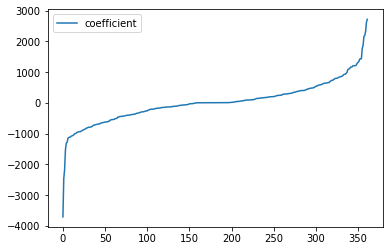

In [13]:
rd=pd.DataFrame({'Predictor': X.columns, 'coefficient':ridge2.coef_})
rd.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(rd)
rd.plot()

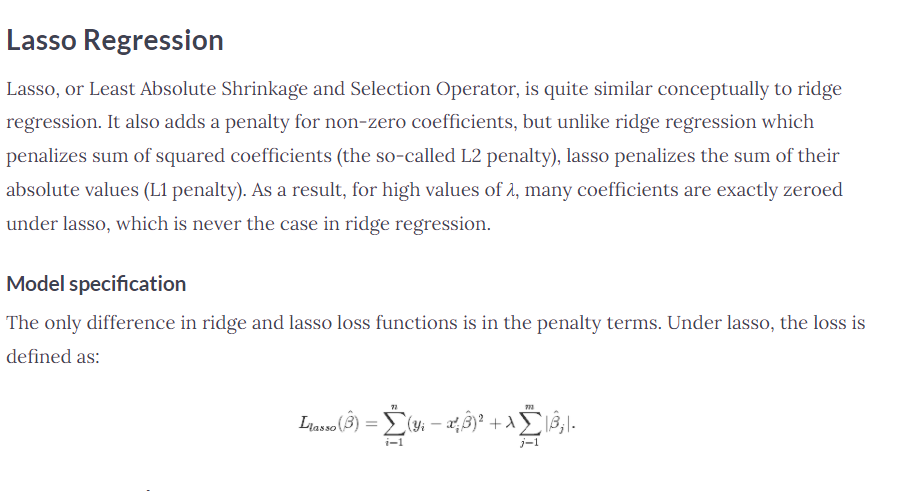

In [15]:
lasso2 = Lasso()
lasso2.fit(X_train, y_train)             # Fit a lasso regression on the training data


Lasso()

In [16]:
 # Use this model to evaluate the training data
predL = lasso2.predict(X_train)          
evalmetric(y_train,predL)

MSE: 678833.4463744605
RMSE: 823.9134944728485
MAE: 658.1665381590244
MAPE: 6.634542784458156
R-Squared: 0.9513222967658873


In [17]:
# Use this model to predict the test data
predL = lasso2.predict(X_test)           
evalmetric(y_test,predL)

MSE: 997580.984280173
RMSE: 998.7897597994149
MAE: 748.9403009674635
MAPE: 7.754462739514582
R-Squared: 0.8988322956693148


                                             Predictor  coefficient
0      Model_TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors -6803.217625
1                  Model_TOYOTA Corolla 1.8D 4/5-Doors -4028.074752
2               Model_TOYOTA Corolla 1.8D Stationwagen -2911.644846
3                  Model_TOYOTA Corolla 2.0D 4/5-Doors -1999.024304
4     Model_TOYOTA Corolla 2.0 D4D SEDAN SOL 4/5-Doors -1657.237486
..                                                 ...          ...
359  Model_TOYOTA Corolla 1.6-16v VVT-i Executive B...  2484.786593
360  Model_TOYOTA Corolla Luna 5drs D4D116 PK 4/5-D...  3114.788928
361  Model_TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BN...  3218.775919
362     Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV  3258.138887
363  Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS...  4165.577028

[364 rows x 2 columns]


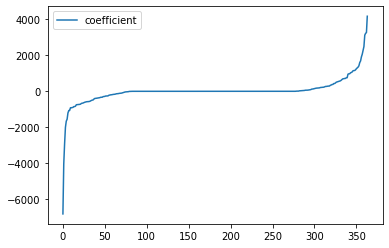

In [ ]:
ls=pd.DataFrame({'Predictor': X.columns, 'coefficient':lasso2.coef_})
ls.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(ls)
ls.plot()

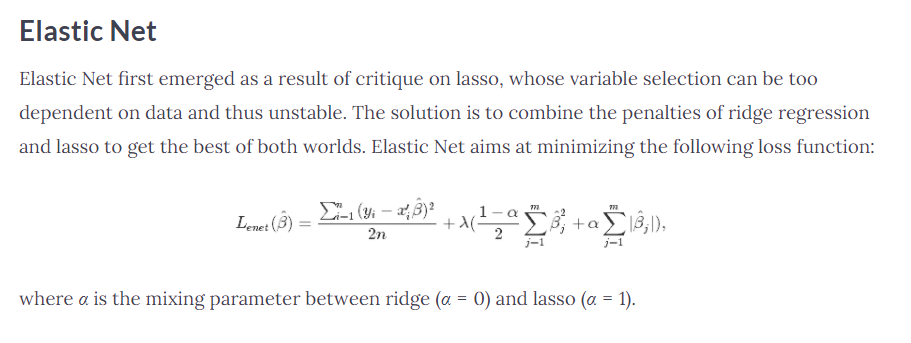

In [23]:
elas = ElasticNet()
elas.fit(X_train, y_train)             # Fit a lasso regression on the training data


ElasticNet()

In [24]:
# Use this model to evaluate in training data
predE = elas.predict(X_train)           
evalmetric(y_train,predE)

MSE: 1500116.5447464045
RMSE: 1224.792449660923
MAE: 903.2410452949017
MAPE: 9.012204353383387
R-Squared: 0.8924298318361479


In [25]:
 # Use this model to predict the test data
predE = elas.predict(X_test)          
evalmetric(y_test,predE)

MSE: 1482342.8392321144
RMSE: 1217.5150262859652
MAE: 907.6234366454041
MAPE: 9.21991171465088
R-Squared: 0.8496711300242419


                                             Predictor  coefficient
0                                            Age_08_04  -173.567542
1                                            Mfg_Month  -139.329585
2                                              Tow_Bar   -56.576024
3    Model_TOYOTA Corolla 1.6 16V HATCHB LINEA TERR...   -55.604558
4                                          Color_Green   -52.703114
..                                                 ...          ...
359                                    Powered_Windows    96.233046
360                                      Mfr_Guarantee    96.408781
361                                          Mistlamps   103.151832
362                                        Sport_Model   105.558495
363                                    Automatic_airco   153.112933

[364 rows x 2 columns]


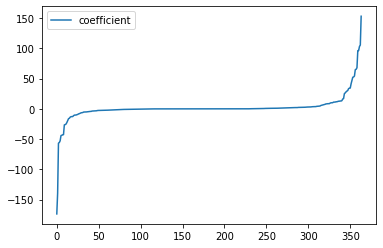

In [ ]:
el=pd.DataFrame({'Predictor': X.columns, 'coefficient':elas.coef_})
el.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(el)
el.plot()

## **SUMMARY**

If your linear model contains many predictor variables or if these variables are correlated, the standard OLS parameter estimates have large variance, thus making the model unreliable.

To counter this, you can use regularization - a technique allowing to decrease this variance at the cost of introducing some bias. Finding a good bias-variance trade-off allows to minimize the model's total error.

There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients:

Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).

Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).

Elastic Net, a convex combination of Ridge and Lasso.

